# Apriori Algorithm for Association Rule Learning

## Introduction

The Apriori algorithm is a widely-used technique in association rule mining, a field of data mining that aims to discover interesting relationships, or *associations*, among a large set of items. Apriori is particularly popular for its application in *market basket analysis*, where it helps retailers understand which products are frequently purchased together.

### How It Works
The Apriori algorithm works by identifying **frequent itemsets** in a dataset. An itemset is considered frequent if it appears in the dataset with a frequency above a specified threshold (called *support*). Apriori proceeds in two key steps:
1. **Frequent Itemset Generation**: The algorithm iteratively searches for combinations of items that meet the minimum support threshold. It uses a "bottom-up" approach, meaning that it starts with individual items and then combines them to form larger itemsets, pruning any itemsets that do not meet the support threshold.
2. **Association Rule Generation**: Once frequent itemsets are identified, Apriori generates **association rules**. Each rule takes the form `A -> B`, meaning that if itemset A is bought, itemset B is likely to be bought as well. These rules are evaluated using two main metrics:
   - **Confidence**: The likelihood that itemset B is purchased when itemset A is purchased.
   - **Lift**: The strength of the rule, calculated as the observed support divided by the expected support if the items were independent.

### Key Terms
- **Support**: The proportion of transactions in the dataset that contain a particular itemset.
- **Confidence**: The probability that a transaction containing itemset A will also contain itemset B.
- **Lift**: A measure of how much more likely itemset B is to occur with itemset A than if they were independent.

### Applications of Apriori
Apriori is commonly used for:
- **Market Basket Analysis**: Finding product associations in retail.
- **Recommender Systems**: Recommending complementary products based on user purchasing history.
- **Medical Diagnosis**: Identifying symptom combinations for certain diseases.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel("Online_Retail.xlsx")
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Online_Retail.xlsx'

In [15]:
# Drop rows with any missing values and filter out negative quantities
df.dropna(inplace=True)
df = df[df['Quantity'] > 0]

# Filter data for United Kingdom transactions
df = df[df['Country'] == 'United Kingdom']

### Create a Basket Matrix for Each Invoice

To apply the Apriori algorithm, we need to transform the dataset into a *basket matrix* format, where each row represents a unique transaction (Invoice) and each column represents an item. The matrix will contain binary values:
- `1` indicates that a particular item was included in the transaction.
- `0` indicates that the item was not purchased in that transaction.

The resulting matrix, called `basket`, is a binary representation of the dataset that we can pass to the Apriori algorithm.

In [6]:
# Create a basket matrix for each invoice
basket = df[df['Quantity'] > 0].groupby(['InvoiceNo', 'Description'])['Quantity'].sum().unstack().fillna(0)
basket = basket.applymap(lambda x: 1 if x > 0 else 0)
basket.head()


C:\Users\dinug\AppData\Local\Temp\ipykernel_22080\893387818.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,TOADSTOOL BEDSIDE LIGHT,...,ZINC STAR T-LIGHT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536366,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Find Frequent Itemsets Using the Apriori Algorithm

In this step, we use the Apriori algorithm to identify **frequent itemsets** within the basket matrix. An itemset is considered frequent if it appears in the dataset with a frequency above a specified threshold, known as *support*. In this example, we set a minimum support threshold of 2%, meaning that we are interested in itemsets that appear in at least 2% of all transactions.

In [ ]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets with a minimum support of 0.02 (2%)
frequent_itemsets = apriori(basket, min_support=0.02, use_colnames=True)
frequent_itemsets.head()

d:\scoala\lab_ml\lab5\lab5_venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.022404,(3 STRIPEY MICE FELTCRAFT)
1,0.037720,(6 RIBBONS RUSTIC CHARM)
2,0.025767,(60 CAKE CASES VINTAGE CHRISTMAS)
3,0.035257,(60 TEATIME FAIRY CAKE CASES)
4,0.026668,(72 SWEETHEART FAIRY CAKE CASES)


### Generate Association Rules from Frequent Itemsets

After identifying the frequent itemsets, the next step is to generate **association rules**. These rules describe the relationships between items, showing how the presence of one item in a transaction can imply the presence of another item. Association rules are evaluated using metrics such as **confidence** and **lift**.

In [12]:
from mlxtend.frequent_patterns import association_rules

# Generate rules with a confidence threshold of 0.5
rules = association_rules(frequent_itemsets, num_itemsets=len(frequent_itemsets), metric="confidence", min_threshold=0.5)
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]


,antecedents,consequents,support,confidence,lift
0,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.027269,0.657971,14.451925
1,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.027269,0.598945,14.451925
2,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.027509,0.617251,16.390122
3,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.027509,0.730463,16.390122
4,(PINK REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.024266,0.819473,22.293137
5,(GREEN REGENCY TEACUP AND SAUCER),(PINK REGENCY TEACUP AND SAUCER),0.024266,0.660131,22.293137
6,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.028590,0.702065,19.099148
7,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.028590,0.777778,19.099148
8,(HEART OF WICKER LARGE),(HEART OF WICKER SMALL),0.023905,0.503161,9.027069
9,(JUMBO BAG BAROQUE BLACK WHITE),(JUMBO BAG RED RETROSPOT),0.020842,0.554313,6.377857


### Step: Visualize Association Rules (Confidence vs. Lift)

Once the association rules are generated, it's useful to visualize their strength using a scatter plot. This plot helps to identify which rules have both high confidence and high lift, indicating strong and potentially interesting relationships between items.


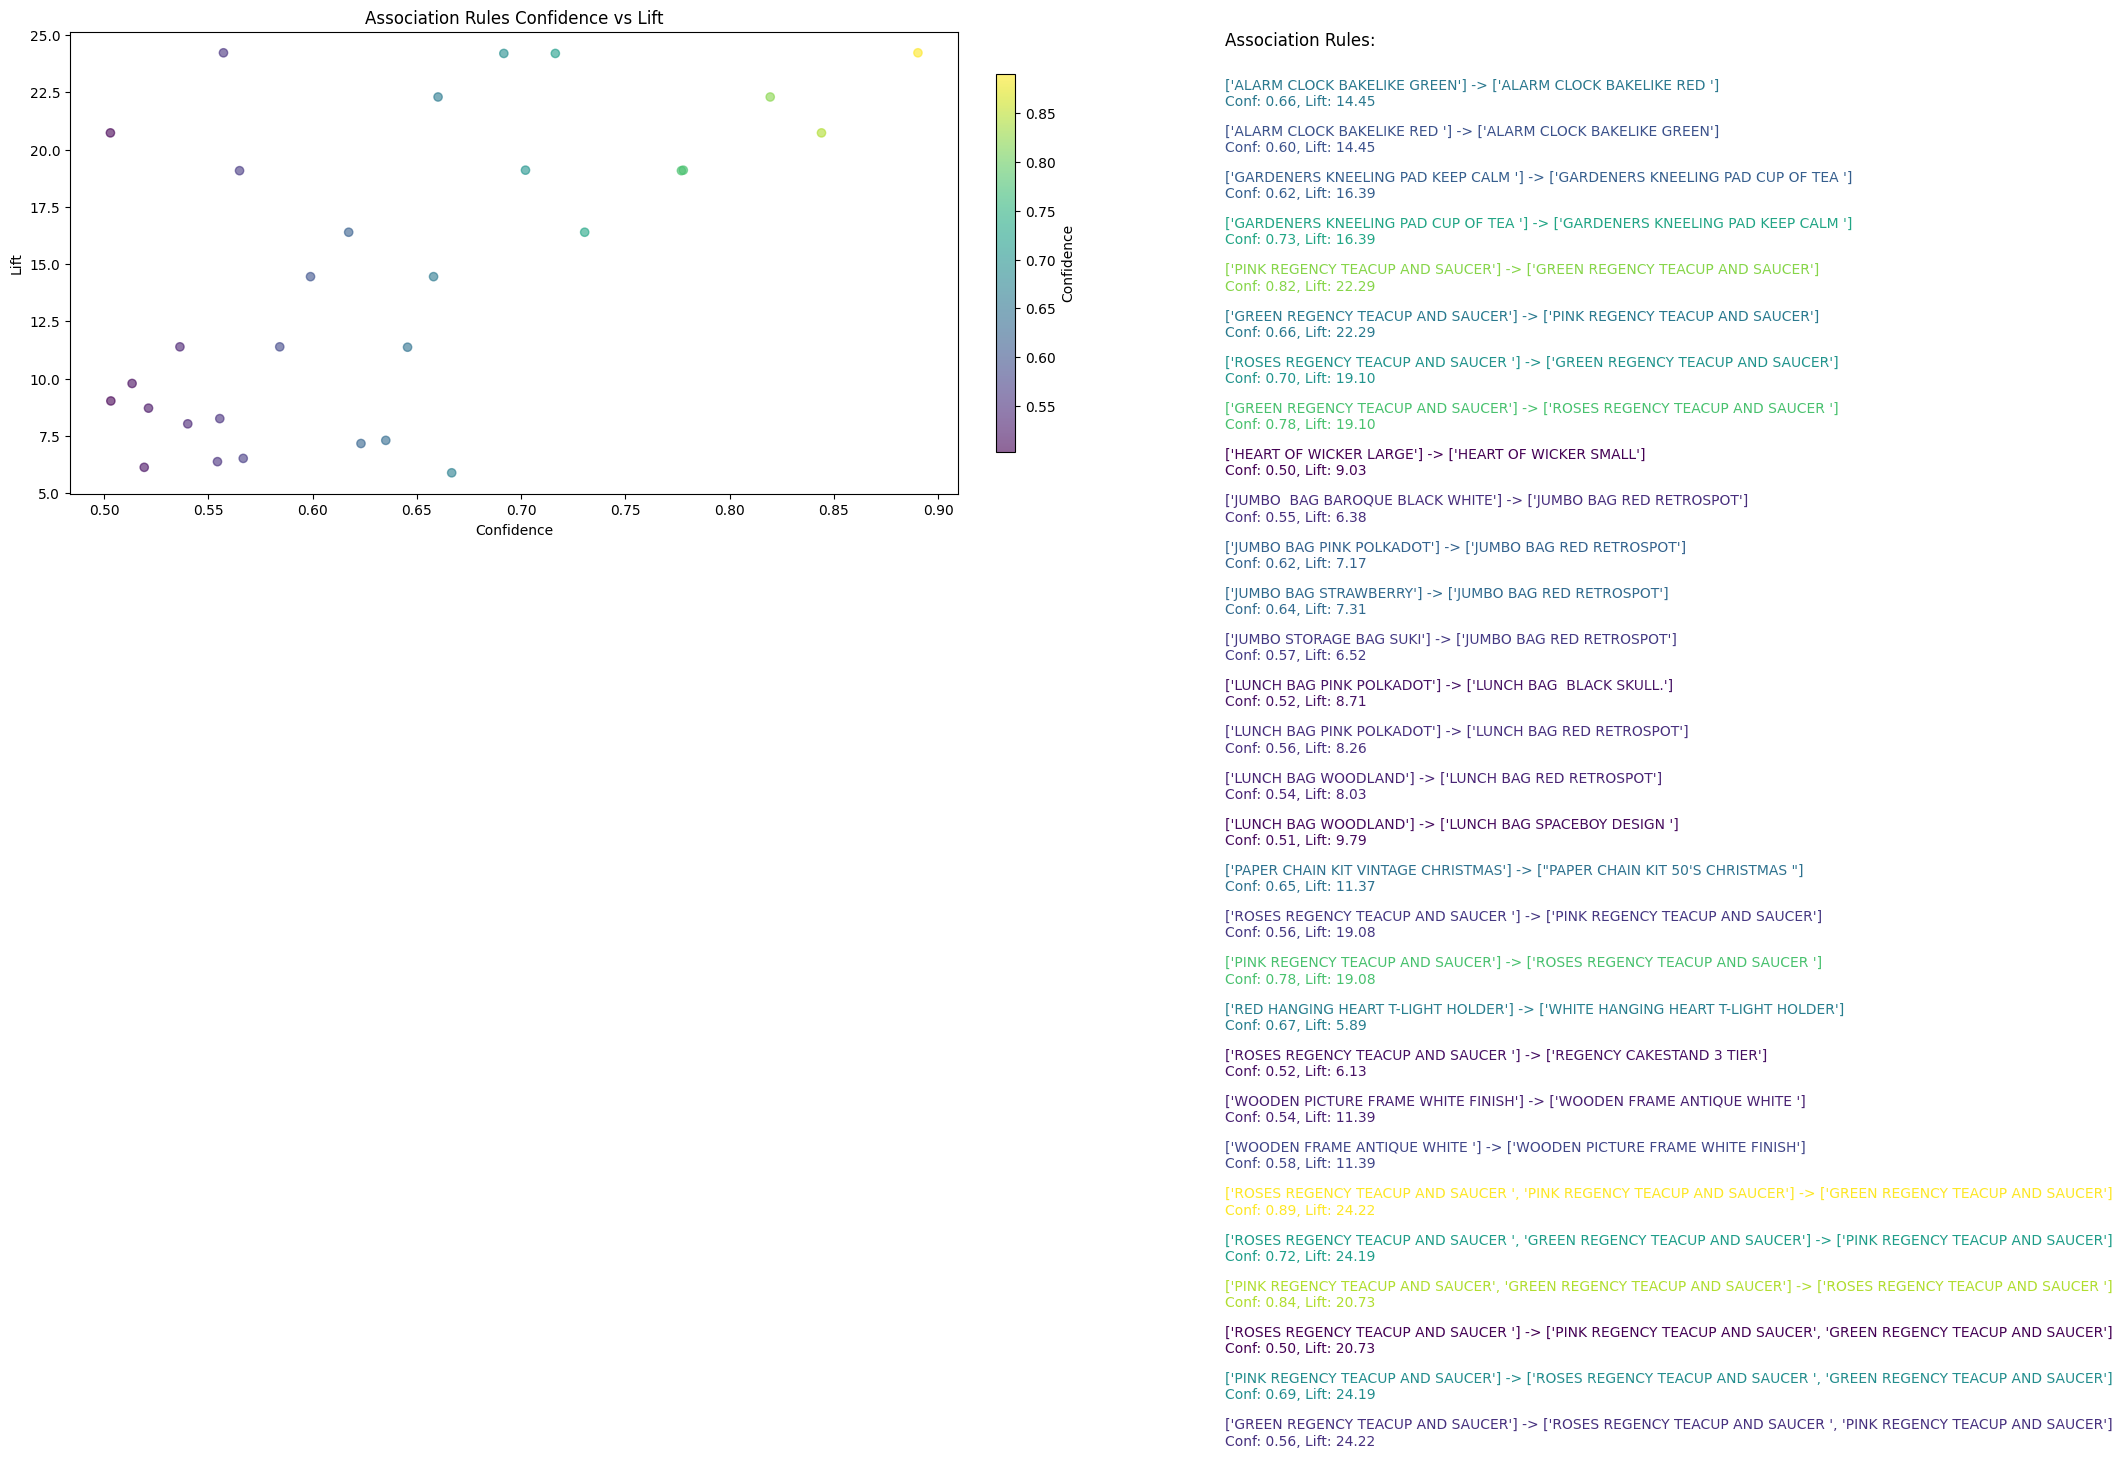

In [40]:
import matplotlib.pyplot as plt
import numpy as np

norm = plt.Normalize(rules['confidence'].min(), rules['confidence'].max())  # Normalize confidence values
cmap = plt.get_cmap("viridis")  # Choose a color map (e.g., 'viridis', 'plasma', etc.)

# Create the scatter plot with color based on confidence
plt.figure(figsize=(14, 6))  # Increase figure size for space
scatter = plt.scatter(rules['confidence'], rules['lift'], c=rules['confidence'], cmap=cmap, alpha=0.6)

# Add labels for each point (rule) with colored names
for i in range(len(rules)):
    plt.annotate('', (rules['confidence'][i], rules['lift'][i]),  # No annotations on the plot itself
                 fontsize=8, alpha=0.7)

# Add axis labels and title
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Association Rules Confidence vs Lift')

# Adjust layout to place more space for the colorbar and product names
plt.subplots_adjust(right=0.80)  # Increase space for product names

# Add colorbar to indicate confidence scale
cbar = plt.colorbar(scatter, fraction=0.02, pad=0.04)  # 'fraction' controls the width of the colorbar
cbar.set_label('Confidence')

# Display the product names and rules on the side (more space to the right)
plt.text(1.3, 1, "Association Rules:", ha='left', va='top', fontsize=12, transform=plt.gca().transAxes)

# List the products with corresponding confidence and lift values, and color the names
for i in range(len(rules)):
    rule_text = f"{list(rules['antecedents'][i])} -> {list(rules['consequents'][i])}\n" \
                f"Conf: {rules['confidence'][i]:.2f}, Lift: {rules['lift'][i]:.2f}"
    color = cmap(norm(rules['confidence'][i]))  # Get the color based on confidence
    plt.text(1.3, 0.9 - i * 0.1, rule_text, ha='left', va='top', fontsize=10, transform=plt.gca().transAxes, color=color)

# Display the plot
plt.show()


## Are there other algorithms beside Apriori for association rules? Yes.

While **Apriori** is one of the most commonly used algorithms for mining association rules, there are other algorithms that can be more efficient, especially when dealing with large datasets or specific types of data. Some of these algorithms include:

1. **FP-growth (Frequent Pattern Growth)**: A faster alternative to Apriori, FP-growth avoids generating candidate itemsets and instead constructs a **compact tree structure** (FP-tree) for efficient mining.
   
2. **Eclat (Equivalence Class Clustering and Hiding)**: This algorithm uses a **vertical data format** and intersects transaction ID sets (tidsets) to identify frequent itemsets. It is often faster than Apriori for datasets with many frequent itemsets.

3. **Genetic Algorithms**: These can be used for association rule mining by evolving candidate solutions through **mutation**, **crossover**, and **selection** based on fitness metrics like support, confidence, and lift.

4. **Closed Itemset Mining**: Focuses on mining **closed itemsets** where no superset of the itemset has the same support. This reduces redundancy and provides a more compact representation of frequent itemsets.

5. **RARM (Rule-based Association Rule Mining)**: An extension of traditional rule mining that focuses on generating **rules under specific conditions** or across different subgroups of the data.

In [41]:
from mlxtend.frequent_patterns import fpgrowth

# Assuming 'basket' is the transaction dataset we have prepared earlier

# Find frequent itemsets with a minimum support of 0.02 (2%)
frequent_itemsets_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)

# Display the frequent itemsets
print(frequent_itemsets_fp.head())

d:\scoala\lab_ml\lab5\lab5_venv\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support                              itemsets
0  0.113160  (WHITE HANGING HEART T-LIGHT HOLDER)
1  0.026308              (HAND WARMER UNION JACK)
2  0.078083       (ASSORTED COLOUR BIRD ORNAMENT)
3  0.039822            (HOME BUILDING BLOCK WORD)
4  0.032074            (LOVE BUILDING BLOCK WORD)
